In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train=pd.read_excel('bank_churn.xlsx')

In [0]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15609562,MacDonald,774,Spain,Female,43,1,116360.07,1,1,0,17004.14,0
1,15578096,Nnachetam,537,France,Male,26,7,106397.75,1,0,0,103563.23,0
2,15674928,Mullah,850,Spain,Male,37,2,0.00,2,1,0,119969.99,0
3,15765322,Connely,755,France,Male,23,5,84284.48,2,1,1,62851.60,0
4,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

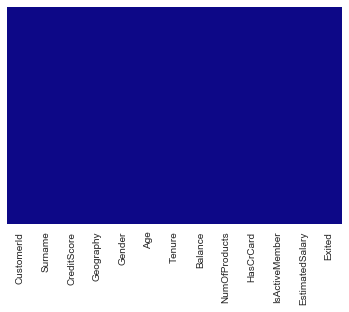

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')

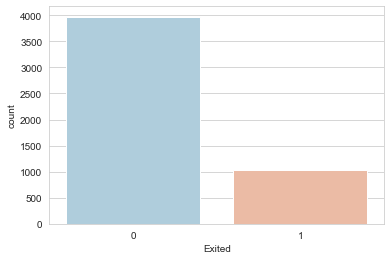

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=train,palette='RdBu_r')

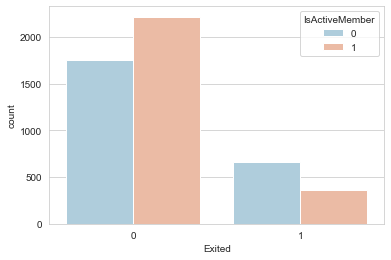

In [0]:
sns.set_style('whitegrid')

sns.countplot(x='Exited',hue='IsActiveMember',data=train,palette='RdBu_r')


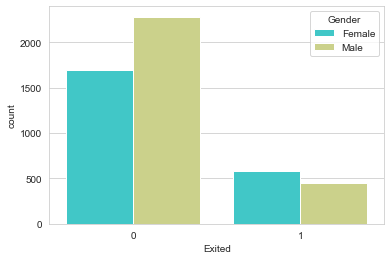

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=train,palette='rainbow')
#sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

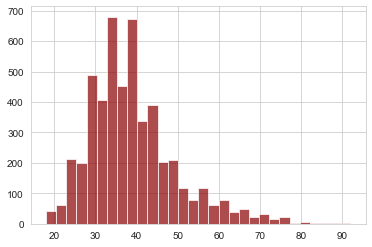

In [0]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

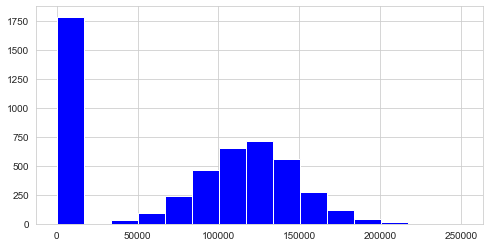

In [0]:
train['Balance'].hist(color='blue',bins=15,figsize=(8,4))

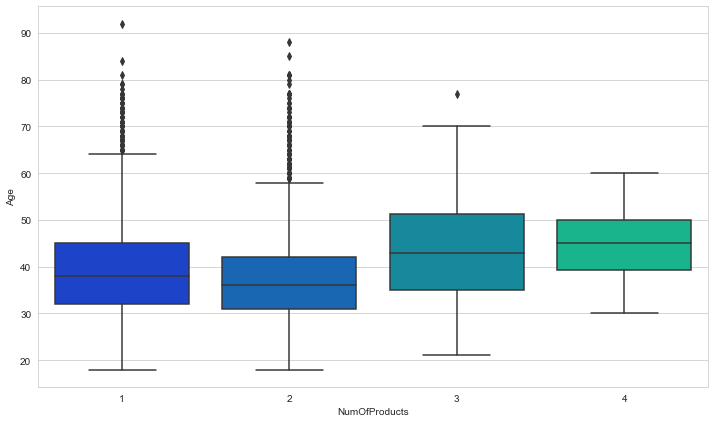

In [0]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='NumOfProducts',y='Age',data=train,palette='winter')

In [0]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15609562,MacDonald,774,Spain,Female,43,1,116360.07,1,1,0,17004.14,0
1,15578096,Nnachetam,537,France,Male,26,7,106397.75,1,0,0,103563.23,0
2,15674928,Mullah,850,Spain,Male,37,2,0.00,2,1,0,119969.99,0
3,15765322,Connely,755,France,Male,23,5,84284.48,2,1,1,62851.60,0
4,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
CustomerId         5000 non-null int64
Surname            5000 non-null object
CreditScore        5000 non-null int64
Geography          5000 non-null object
Gender             5000 non-null object
Age                5000 non-null int64
Tenure             5000 non-null int64
Balance            5000 non-null float64
NumOfProducts      5000 non-null int64
HasCrCard          5000 non-null int64
IsActiveMember     5000 non-null int64
EstimatedSalary    5000 non-null float64
Exited             5000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 507.9+ KB


In [0]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15609562,MacDonald,774,Spain,Female,43,1,116360.07,1,1,0,17004.14,0
1,15578096,Nnachetam,537,France,Male,26,7,106397.75,1,0,0,103563.23,0
2,15674928,Mullah,850,Spain,Male,37,2,0.00,2,1,0,119969.99,0
3,15765322,Connely,755,France,Male,23,5,84284.48,2,1,1,62851.60,0
4,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0


In [0]:
Gender=pd.get_dummies(train['Gender'],drop_first=True)
train=pd.concat([train,Gender], axis=1)
train.drop(['Surname','Geography','Gender'], axis=1, inplace=True)

In [0]:
train.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,15609562,774,43,1,116360.07,1,1,0,17004.14,0,0
1,15578096,537,26,7,106397.75,1,0,0,103563.23,0,1
2,15674928,850,37,2,0.00,2,1,0,119969.99,0,1
3,15765322,755,23,5,84284.48,2,1,1,62851.60,0,1
4,15647572,504,34,0,54980.81,1,1,1,136909.88,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), 
                                                    train['Exited'], test_size=0.2, 
                                                    random_state=101)

## Training and Predicting

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\hemantkumar.wani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       783
           1       0.00      0.00      0.00       217

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.61      0.78      0.69      1000



C:\Users\hemantkumar.wani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
accuracy_score(y_test, predictions)

0.783

In [0]:
confusion_matrix(y_test,predictions)

array([[783,   0],
       [217,   0]], dtype=int64)